In [1]:
using LinearAlgebra
using Plots
using Distributions
using Statistics
using DataFrames
using Images
using ImageView
using SparseArrays
using Interpolations

En este cuaderno se compilan los datos de interés para el modelo TOMGRO tomados del cultivo en un invernadero del campus de la UN Sede Bogotá. Los datos son los siguientes:

| Variable | Mediciones en el tiempo | Unidades |
|--------------|--------------|--------------|
| Área foliar | 1 | cm^2 |
| Número de hojas | 20 | n |
| Número de frutos | 20 | n |
| Peso de frutos | 2 | g |


# Área estimada de las hojas para un tiempo

La observación se realizó el día 17/05/2024 correspondiente a $ddt = 89$.

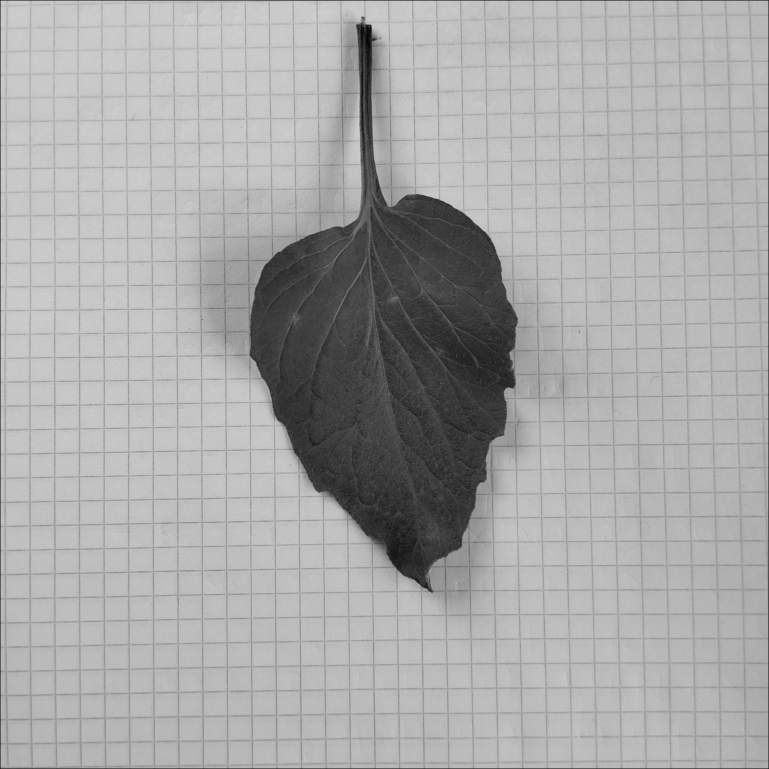

In [2]:
# Cargar la imagen
img = load("Downloads/IMG_20240517_155257.jpg")
# Convertir la imagen a escala de grises
gray_img = Gray.(img)

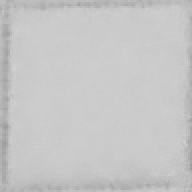

In [3]:
cuadro = gray_img[20:115,25:120]
pixporcuadro = size(cuadro)[1]^2
cuadro

In [4]:
# Umbral para binarizar la imagen (ajustar según sea necesario)
binary_img = gray_img .> 0.68
print(count(x -> x, binary_img))
sparse(binary_img)

7048585

3072×3072 SparseMatrixCSC{Bool, Int64} with 7048585 stored entries:
⎡⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⎤
⎢⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⢸⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⎥
⎢⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⎥
⎢⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⎥
⎢⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⢹⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⎥
⎢⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⡿⠈⠛⠉⠙⠻⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⎥
⎢⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⡿⠛⠉⠁⠀⠀⠀⠀⠀⠀⠀⢻⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⎥
⎢⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⡟⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⎥
⎢⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⡇⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⢸⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⎥
⎢⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣧⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⢻⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⎥
⎢⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣇⠀⠀⠀⠀⠀⠂⠠⠀⠀⠀⠀⣻⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⎥
⎢⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⡆⠀⠀⠀⠀⠀⠀⠀⠀⠀⣴⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⎥
⎢⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣆⡀⠀⠀⠀⠀⠀⠀⢠⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⎥
⎢⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣦⠀⠀⠀⠀⠀⣜⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⎥
⎢⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣷⣄⡀⣠⡶⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⎥
⎢⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⎥
⎢⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⎥
⎢⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⎥
⎢⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⎥
⎣⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⎦

In [5]:
num_white_pixels = count(x -> x, binary_img)
area_per_pixel = 0.25/pixporcuadro

# Calcular el área total de la hoja
total_area = num_white_pixels * area_per_pixel

println("El área de la hoja es aproximadamente $(total_area) cm^2")

El área de la hoja es aproximadamente 191.20510525173611 cm^2


In [6]:
Nombre_Imagen = ["Downloads/IMG_20240517_155108.jpg","Downloads/IMG_20240517_155127.jpg","Downloads/IMG_20240517_155142.jpg",
                "Downloads/IMG_20240517_155206.jpg","Downloads/IMG_20240517_155426.jpg","Downloads/IMG_20240517_155257.jpg"]
Grises = [Gray.(load(a)) for a in Nombre_Imagen]
Cuadros = [Grises[1][60:135,87:170],Grises[2][73:152,66:143],Grises[3][125:200,80:158],Grises[4][162:275,65:172],
        Grises[5][168:241,90:166],Grises[6][20:115,25:120]]
Pixporcuadros = [size(a)[1]*size(a)[2] for a in Cuadros]
Binaryimg = [Grises[1] .> 0.65, Grises[2] .> 0.66, Grises[3] .> 0.72, Grises[4] .> 0.72, Grises[5] .> 0.66, Grises[6] .> 0.68]
TotalArea = [count(x -> x, Binaryimg[i]) * 0.25/Pixporcuadros[i] for i=1:6]
mean(TotalArea)
println("El área promedio de un foliolo de hoja es aproximadamente ", mean(TotalArea)," cm^2")

El área promedio de un foliolo de hoja es aproximadamente 218.90447622867703 cm^2


El promedio de foliolos por hojas es de alrededor de $5$, por lo tanto,

In [9]:
println("El área promedio de una hoja es aproximadamente ", 5*mean(TotalArea)," cm^2")

El área promedio de una hoja es aproximadamente 1094.5223811433852 cm^2


# Síntesis de datos

In [7]:
data = DataFrame(
    Fecha_de_Observacion = ["22/2/2024", "23/2/2024", "24/2/2024", "26/2/2024", "27/2/2024", "28/2/2024", "29/2/2024", 
                            "1/3/2024", "3/3/2024", "9/3/2024", "24/3/2024", "25/3/2024", "26/3/2024", "27/3/2024", 
                            "28/3/2024", "29/3/2024", "23/4/2024", "29/4/2024", "4/5/2024", "10/5/2024"],
    ddt = [3, 4, 5, 7, 8, 9, 10, 11, 13, 19, 34, 35, 36, 37, 38, 39, 64, 70, 75, 81],
    Numero_de_hojasGEM = [5.40, 6.53, 6.31, 6.35, 7.43, 6.70, 5.81, 6.43, 7.45, 7.22, 10.62, 10.92, 11.35, 11.62, 
                       11.62, 11.65, 14.56, 15.00, 15.00, 12.23],
    Total_numero_de_frutosGEM = [0.00, 0.00, 0.00, 0.00, 0.00, 0.00, 0.00, 0.00, 0.00, 0.00, 3.54, 4.00, 4.54, 4.62, 
                              4.62, 4.54, 20.67, 22.625, 27.85, 30.85],
    Numero_de_hojasTRO = [4.56, 5.54, 5.72, 5.88, 6.67, 6.76, 5.75, 7.21, 7.04, 7.78, 10.47, 10.82, 11.35, 
                            11.59, 11.65, 11.71, 15.50, 16.00, 17.65, 12.82],
    Total_numero_de_frutosTRO = [0.00, 0.00, 0.00, 0.00, 0.00, 0.00, 0.00, 0.00, 0.00, 0.00, 2.06, 2.12, 
                                    3.12, 3.24, 3.24, 3.12, 17.86, 23.50, 29.18, 30.53],
)
dataWF = DataFrame(
    Fecha_de_Observacion = ["13/5/2024", "25/5/2024"],
    ddt = [84, 96],
    PesoGEM = [155.38, 172.31],
    PesoTRO = [218.82,274.71])

println(data)

20×6 DataFrame
 Row │ Fecha_de_Observacion  ddt    Numero_de_hojasGEM  Total_numero_de_frutosGEM  Numero_de_hojasTRO  Total_numero_de_frutosTRO 
     │ String                Int64  Float64             Float64                    Float64             Float64                   
─────┼───────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
   1 │ 22/2/2024                 3                5.4                       0.0                  4.56                       0.0
   2 │ 23/2/2024                 4                6.53                      0.0                  5.54                       0.0
   3 │ 24/2/2024                 5                6.31                      0.0                  5.72                       0.0
   4 │ 26/2/2024                 7                6.35                      0.0                  5.88                       0.0
   5 │ 27/2/2024                 8                7.43                      0.0    

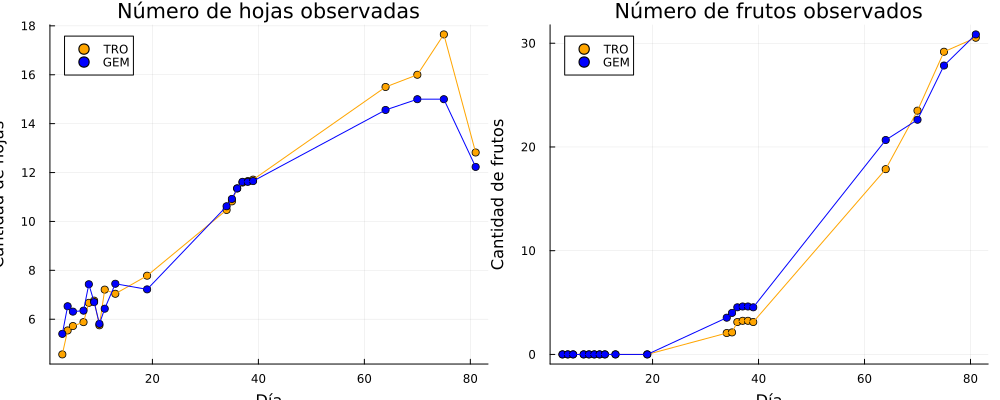

In [8]:
p1 = scatter(data.ddt,data.Numero_de_hojasTRO,label="TRO",color="orange",title="Número de hojas observadas", xlabel="Día", ylabel="Cantidad de hojas")
p1 = plot!(data.ddt,data.Numero_de_hojasTRO,label="",color="orange")
p1 = scatter!(data.ddt,data.Numero_de_hojasGEM,label="GEM",color="blue")
p1 = plot!(data.ddt,data.Numero_de_hojasGEM,label="",color="blue")

p2 = scatter(data.ddt,data.Total_numero_de_frutosTRO,label="TRO",color="orange",title="Número de frutos observados", xlabel="Día", ylabel="Cantidad de frutos")
p2 = plot!(data.ddt,data.Total_numero_de_frutosTRO,label="",color="orange")
p2 = scatter!(data.ddt,data.Total_numero_de_frutosGEM,label="GEM",color="blue")
p2 = plot!(data.ddt,data.Total_numero_de_frutosGEM,label="",color="blue")

plot(p1,p2,layout=(1,2),size=(1000,400))

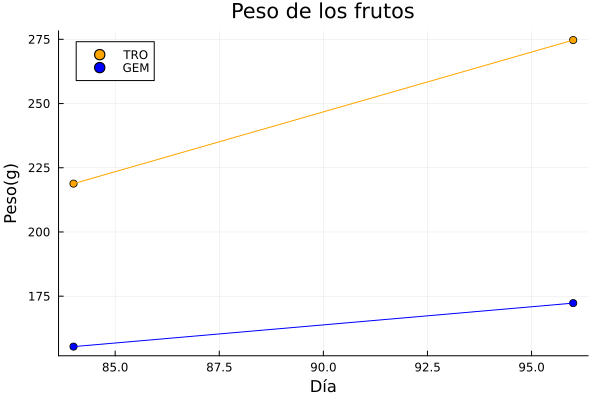

In [11]:
p3 = scatter(dataWF.ddt,dataWF.PesoTRO,label="TRO",color="orange",title="Peso de los frutos", xlabel="Día", ylabel="Peso(g)")
p3 = plot!(dataWF.ddt,dataWF.PesoTRO,label="",color="orange")
p3 = scatter!(dataWF.ddt,dataWF.PesoGEM,label="GEM",color="blue")
p3 = plot!(dataWF.ddt,dataWF.PesoGEM,label="",color="blue")
plot(p3)